# Momentum in Technical Analysis

Momentum is a key concept in technical analysis that refers to the speed or strength of price movements
in a particular direction. 
It helps traders identify the strength of a trend and potential reversal points.

1. Relative Strength Index (RSI): 

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. It is a popular technical indicator used in financial markets to identify overbought and oversold conditions of an asset. RSI values range from 0 to 100, with readings above 70 generally considered overbought, and readings below 30 considered oversold.

Formula:

The RSI is calculated using the following formula:

RSI = 100 - (100 / (1 + RS))

Where:

RS (Relative Strength) is the average of the closing price of up periods divided by the average of the closing price of down periods over a specified period (usually 14 days).

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def plot_rsi(data, ticker, window):
    rsi = calculate_rsi(data, window)
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, rsi, label=f'{ticker} RSI ({window} days)')
    plt.axhline(70, color='r', linestyle='--', alpha=0.5)
    plt.axhline(30, color='g', linestyle='--', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.title(f'{ticker} Relative Strength Index (RSI)')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed


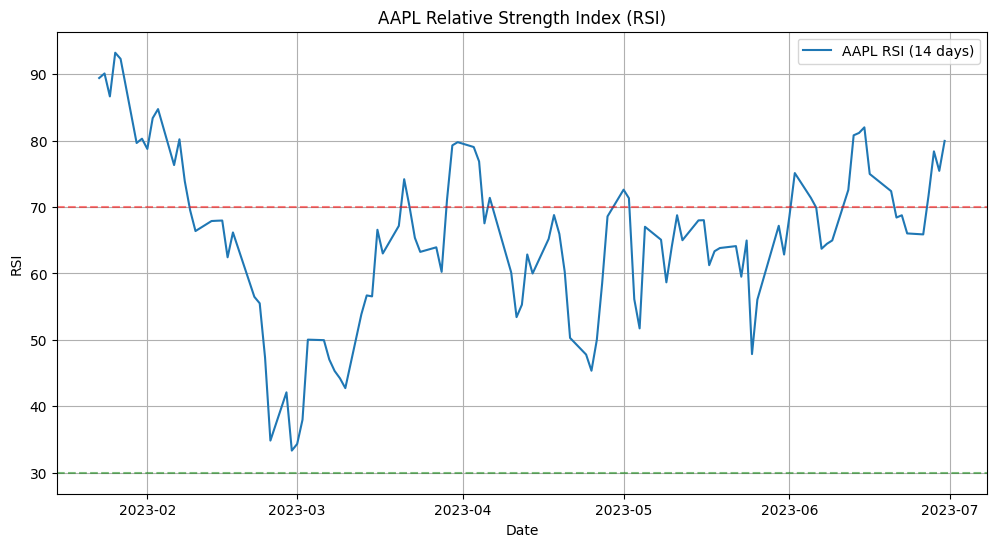

In [3]:
ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
start_date = '2023-01-01'
end_date = '2023-07-01'
rsi_window = 14  # RSI window size

stock_data = fetch_stock_data(ticker, start_date, end_date)
# print(stock_data.tail())  # Print the last few rows of the data fetched

plot_rsi(stock_data, ticker, rsi_window)

2. Moving Average Convergence Divergence (MACD)

The Moving Average Convergence Divergence (MACD) is a popular momentum indicator used in technical analysis to identify changes in the strength, direction, momentum, and duration of a trend in a financial instrument's price. It consists of two lines: the MACD line and the signal line (also known as the trigger line).

**Formula:**

1. Calculate the Short-term Exponential Moving Average (EMA) over a specified period (usually 12 days):
   ```
   ShortEMA = EMA(Close, ShortPeriod)
   ```

2. Calculate the Long-term Exponential Moving Average (EMA) over a specified period (usually 26 days):
   ```
   LongEMA = EMA(Close, LongPeriod)
   ```

3. Calculate the MACD line as the difference between the ShortEMA and LongEMA:
   ```
   MACDLine = ShortEMA - LongEMA
   ```

4. Calculate the Signal line (Trigger line) as the EMA of the MACD line over a specified period (usually 9 days):
   ```
   SignalLine = EMA(MACDLine, SignalPeriod)
   ```

In the formulas above:
- `Close` refers to the closing price of the financial instrument.
- `EMA` stands for Exponential Moving Average.
- `ShortPeriod`, `LongPeriod`, and `SignalPeriod` are the time periods (typically expressed in days) used for calculating the respective EMAs.

The MACD line represents the difference between the short-term and long-term EMAs, indicating the strength and direction of the price trend. The Signal line is an EMA of the MACD line, smoothing it further to provide potential buy and sell signals.

The MACD indicator generates signals based on the crossovers between the MACD line and the Signal line. When the MACD line crosses above the Signal line, it may be considered a bullish signal, and when it crosses below the Signal line, it may be considered a bearish signal. Additionally, the distance between the MACD line and the Signal line can give insights into the momentum of the trend.


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

def plot_macd(data, ticker, short_window, long_window, signal_window):
    macd, signal_line, histogram = calculate_macd(data, short_window, long_window, signal_window)
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, macd, label=f'{ticker} MACD ({short_window}, {long_window}, {signal_window})', color='blue')
    plt.plot(data.index, signal_line, label=f'Signal Line ({signal_window})', color='red')
    plt.bar(data.index, histogram, label='Histogram', color='gray', alpha=0.5)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.title(f'{ticker} Moving Average Convergence Divergence (MACD)')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed


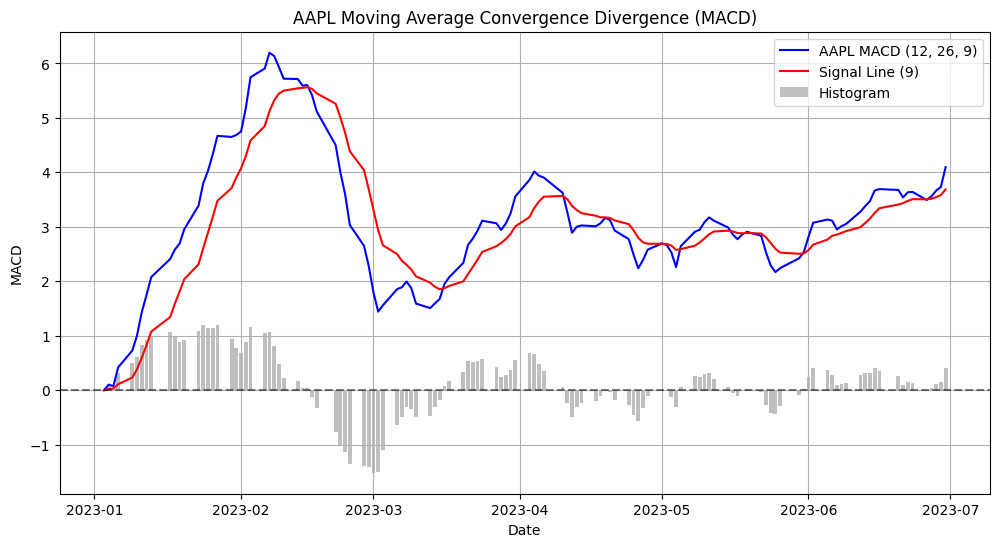

In [6]:
ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
start_date = '2023-01-01'
end_date = '2023-07-01'
short_window = 12  # Short-term EMA window size
long_window = 26   # Long-term EMA window size
signal_window = 9  # Signal line window size

stock_data = fetch_stock_data(ticker, start_date, end_date)
# print(stock_data.tail())  # Print the last few rows of the data fetched

plot_macd(stock_data, ticker, short_window, long_window, signal_window)

3. Stochastic Oscillator

The Stochastic Oscillator is a popular momentum indicator used in technical analysis to compare a security's closing price to its price range over a specific period of time. The indicator helps traders identify overbought and oversold conditions, which can suggest potential reversal points in the price movement. The Stochastic Oscillator generates values between 0 and 100.

Calculation:

The Stochastic Oscillator is calculated using the following formula:

%K = ((Current Close - Lowest Low) / (Highest High - Lowest Low)) * 100

Where:

Current Close is the closing price of the current period.
Lowest Low is the lowest price in the selected period (e.g., 14-day).
Highest High is the highest price in the selected period (e.g., 14-day).
Additionally, there is a smoothed version called %D (the "signal line") that is often calculated as a moving average of %K over a specified period (e.g., 3-day).

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_stochastic_oscillator(data, k_window, d_window):
    lowest_low = data['Low'].rolling(window=k_window).min()
    highest_high = data['High'].rolling(window=k_window).max()

    data['%K'] = (data['Close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=d_window).mean()
    return data['%K'], data['%D']

def plot_stochastic_oscillator(data, ticker, k_window, d_window):
    k, d = calculate_stochastic_oscillator(data, k_window, d_window)
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, k, label=f'%K ({k_window})', color='blue')
    plt.plot(data.index, d, label=f'%D ({d_window})', color='red')
    plt.axhline(80, color='r', linestyle='--', alpha=0.5)
    plt.axhline(20, color='g', linestyle='--', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Stochastic Oscillator')
    plt.title(f'{ticker} Stochastic Oscillator')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed


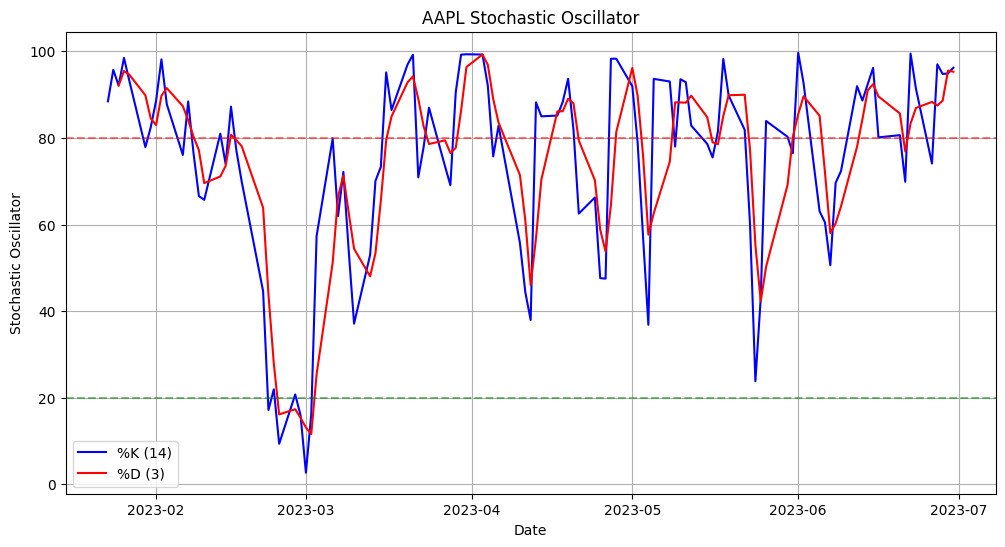

In [8]:
    ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
    start_date = '2023-01-01'
    end_date = '2023-07-01'
    k_window = 14  # Stochastic %K window size
    d_window = 3   # Stochastic %D window size

    stock_data = fetch_stock_data(ticker, start_date, end_date)
#     print(stock_data.tail())  # Print the last few rows of the data fetched

    plot_stochastic_oscillator(stock_data, ticker, k_window, d_window)